## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from blis.py import axpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection

In [3]:
# Using pandas to read data wine
data = pd.read_csv('./winequality-red.csv')

In [4]:
#Row and col
data.shape

(1599, 12)

In [5]:
# First 5 rows data set
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#check missing value
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [10]:
# statistical measures of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


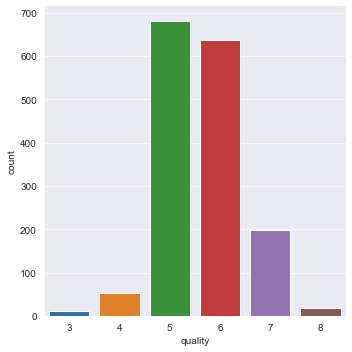

In [11]:
# number values of each quality
sns.catplot(data=data, x='quality', kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

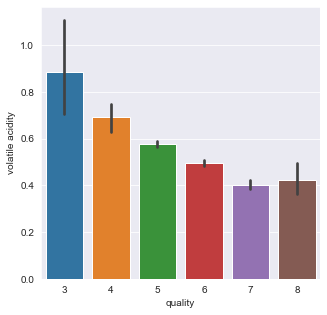

In [13]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

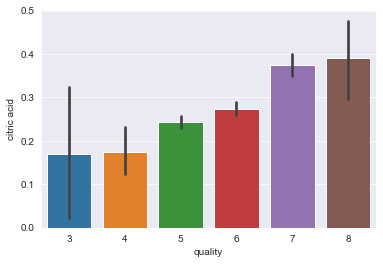

In [21]:
# citric acid vs quality
sns.barplot(data=data, y='citric acid', x='quality', )

## Correlation
1. Positive
2. Negative

In [22]:
correlation = data.corr()

In [23]:
#contrucing a heap to understand the correlation between the columns

<AxesSubplot:>

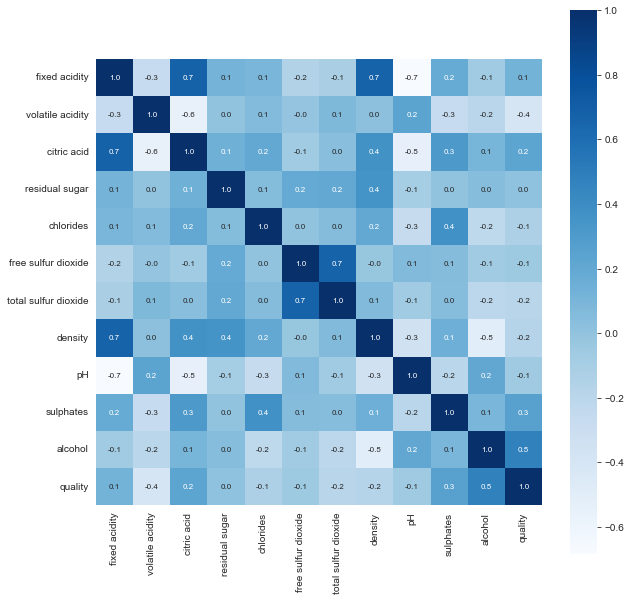

In [24]:
plt.figure(figsize=[10,10])
sns.heatmap(correlation, cbar=True, square=True, annot= True, fmt='.1f', annot_kws= {'size' : 8}, cmap="Blues")

## Data Preprocessing

In [31]:
# separate the data and label
X = data.drop(['quality'], axis=1)
y = data.iloc[:,-1]

In [32]:
## Cover label to 0 and 1
y = y.apply(lambda x : 1 if x >7 else 0)


In [34]:
# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Model training:
###  Random Forest Classifier

In [35]:
model = RandomForestClassifier(n_estimators=10,
                               max_depth=100,
                               random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=10, random_state=1)

## Model Evaluation

1. Accuracy Score

In [38]:
# accuracy on test data
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(predict_test, y_test)
print(f'Accuracy on test data  : {accuracy_test}')

Accuracy on test data  : 0.99375


In [39]:
# accuracy on train data
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(predict_train, y_train)
print(f'Accuracy on train data  : {accuracy_train}')

Accuracy on train data  : 0.9953088350273651
